In [33]:
import random
import time
import matplotlib.pyplot as plt


In [34]:
randomlist = []
for i in range(0,50):
    n = random.randint(1,50)
    randomlist.append(n)
randomlist.sort(reverse=True)
print(randomlist)


[50, 50, 49, 48, 46, 46, 45, 44, 44, 43, 43, 42, 42, 42, 40, 38, 38, 37, 36, 36, 34, 34, 34, 33, 33, 30, 27, 27, 26, 25, 23, 20, 20, 19, 19, 18, 16, 14, 13, 12, 12, 9, 9, 8, 8, 6, 5, 5, 4, 2]


In [35]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr

In [36]:
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot

def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)

In [37]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result

def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

In [38]:
bubble_time = {}
quick_time = {}
merge_time = {}

# Value of n chosen based on the limitations of the machine to calculate n factorials in a reasonable time
n = 2

In [39]:
# Calculates average time for n runs of N
def avg_time(ls):
    return sum(ls) / len(ls)

In [40]:
search_ls = randomlist.copy()

while len(search_ls) != 1:
    bubble_time_ls = []
    #used to find the average value of n runs for each value of num to reduce noise
    for i in range(n):
        start_timer = time.time()
        bubble_sort(search_ls)
        bubble_time_ls.append(time.time() - start_timer)
    bubble_time[len(search_ls)] = avg_time(bubble_time_ls)

    quick_time_ls = []
    #used to find the average value of n runs for each value of num to reduce noise
    for i in range(n):
        start_timer = time.time()
        quicksort(search_ls)
        quick_time_ls.append(time.time() - start_timer)
    quick_time[len(search_ls)] = avg_time(quick_time_ls)

    merge_time_ls = []
    #used to find the average value of n runs for each value of num to reduce noise
    for i in range(n):
        start_timer = time.time()
        mergesort(search_ls)
        merge_time_ls.append(time.time() - start_timer)
    merge_time[len(search_ls)] = avg_time(merge_time_ls)

    search_ls.pop()

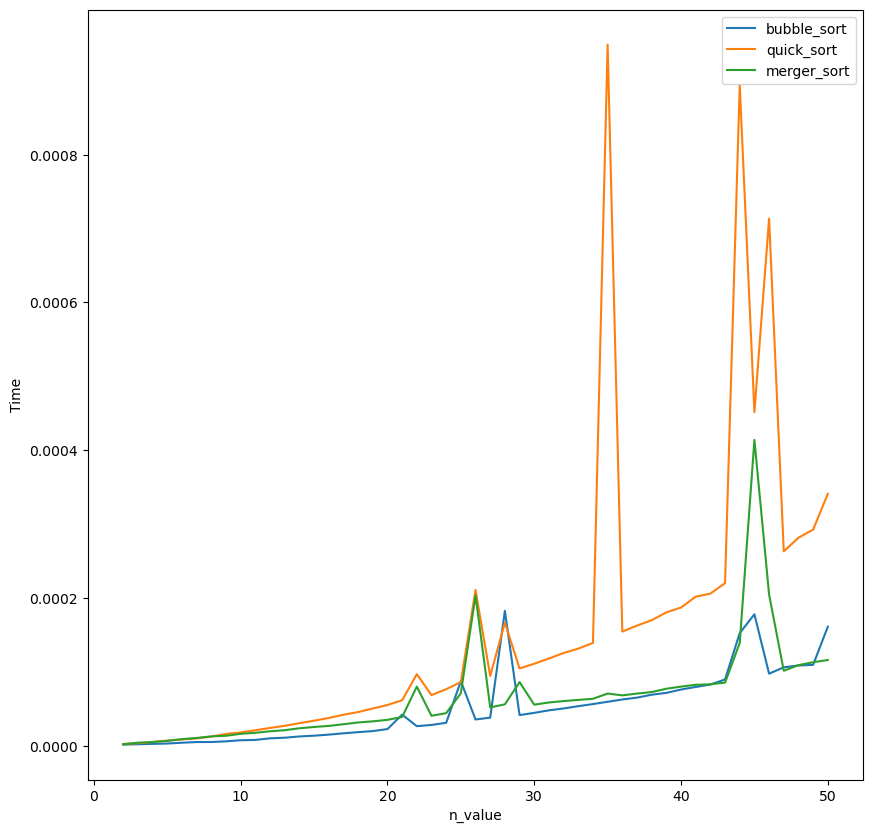

In [41]:
# plots the results
plt.figure(figsize=(10,10))
plt.plot(list(bubble_time.keys()), list(bubble_time.values()), label="bubble_sort")
plt.plot(list(quick_time.keys()), list(quick_time.values()), label="quick_sort")
plt.plot(list(merge_time.keys()), list(merge_time.values()), label="merger_sort")
plt.ylabel("Time")
plt.xlabel("n_value")
plt.legend()
plt.show()